In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
four_df = pd.read_csv("in/results_fourrooms.csv")
pin_df = pd.read_csv("in/results_pinball.csv")
pick_df = pd.read_csv("in/results_pick_and_place.csv")

In [9]:
four_df.head()

,HRS-mean,HRS-se,HRS-upper,HRS-lower,RRS-mean,RRS-se,RRS-upper,RRS-lower,SARSA-mean,SARSA-se,...,SARSA-RS-upper,SARSA-RS-lower,HRS-init-mean,HRS-init-se,HRS-init-upper,HRS-init-lower,RRS-init-mean,RRS-init-se,RRS-init-upper,RRS-init-lower
0,686.484,9.207439,695.691439,677.276561,711.724,9.301700,721.025700,702.422300,732.87,29.561874,...,747.584911,729.219089,688.074,8.608404,696.682404,679.465596,699.354,8.300266,707.654266,691.053734
1,686.915,9.183853,696.098853,677.731147,719.244,8.983508,728.227508,710.260492,778.19,26.575312,...,726.266770,708.161230,724.128,9.071442,733.199442,715.056558,682.739,8.959411,691.698411,673.779589
2,605.042,9.521686,614.563686,595.520314,648.322,9.349555,657.671555,638.972445,657.71,30.314317,...,544.545391,525.906609,643.837,9.643665,653.480665,634.193335,649.448,9.420887,658.868887,640.027113
3,609.468,9.634741,619.102741,599.833259,621.529,9.510009,631.039009,612.018991,667.13,29.800236,...,492.663678,474.740322,596.097,9.421033,605.518033,586.675967,595.665,9.645002,605.310002,586.019998
4,550.844,9.536039,560.380039,541.307961,609.602,9.585735,619.187735,600.016265,692.75,32.008384,...,371.968235,355.921765,530.049,9.741092,539.790092,520.307908,544.504,9.627735,554.131735,534.876265


In [10]:
pin_df.keys()

Index(['Unnamed: 0', 'AC-mean', 'AC-10_moving_average', 'AC-se', 'AC-upper',
       'AC-lower', 'HRS-mean', 'HRS-10_moving_average', 'HRS-se', 'HRS-upper',
       'HRS-lower', 'RRS-mean', 'RRS-10_moving_average', 'RRS-se', 'RRS-upper',
       'RRS-lower', 'NRS-mean', 'NRS-10_moving', 'NRS-se', 'NRS-upper',
       'NRS-lower', 'SARSA-RS-mean', 'SARSA-RS-se', 'SARSA-RS-10_moving',
       'SARSA-RS-upper', 'SARSA-RS-lower'],
      dtype='object')

In [11]:
def plot_mean_se(y, y_lower, y_upper, color="black", alpha=1, label="", line_width=4):
    x = np.arange(1, len(y)+1)
    plt.plot(x, y, color=color, label=label, linewidth=line_width)
    plt.fill_between(x, y_lower, y_upper, alpha=alpha, color=color)

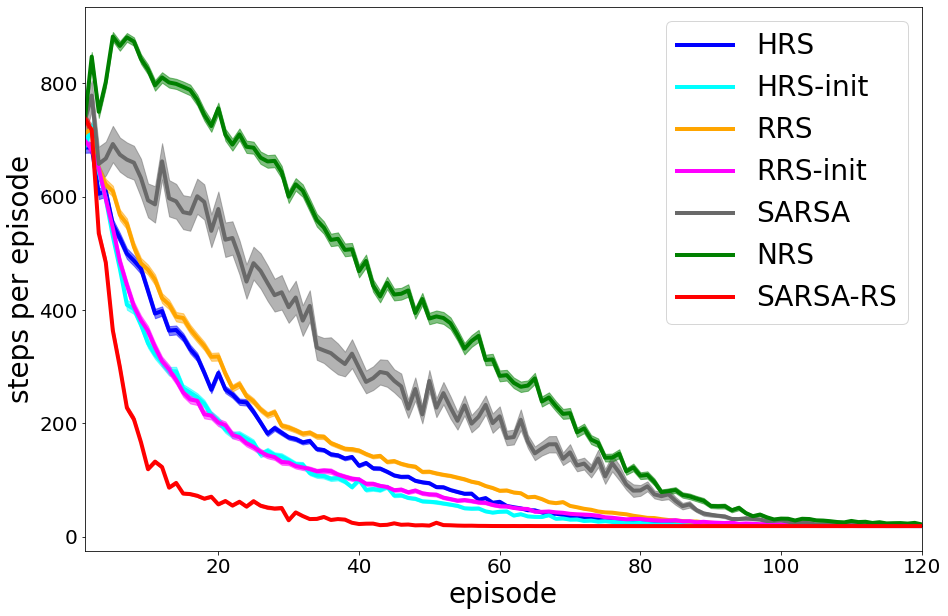

In [9]:
l_episodes = 120
plt.figure(figsize=(15, 10))
plt.tick_params(labelsize=20)
plot_mean_se(four_df["HRS-mean"][:l_episodes], four_df["HRS-lower"][:l_episodes], four_df["HRS-upper"][:l_episodes], "blue", 0.5, "HRS")
plot_mean_se(four_df["HRS-init-mean"][:l_episodes], four_df["HRS-init-lower"][:l_episodes], four_df["HRS-init-upper"][:l_episodes], "cyan", 0.5, "HRS-init")
plot_mean_se(four_df["RRS-mean"][:l_episodes], four_df["RRS-lower"][:l_episodes], four_df["RRS-upper"][:l_episodes], "orange", 0.5, "RRS")
plot_mean_se(four_df["RRS-init-mean"][:l_episodes], four_df["RRS-init-lower"][:l_episodes], four_df["RRS-init-upper"][:l_episodes], "magenta", 0.5, "RRS-init")
plot_mean_se(four_df["SARSA-mean"][:l_episodes], four_df["SARSA-lower"][:l_episodes], four_df["SARSA-upper"][:l_episodes], "dimgray", 0.5, "SARSA")
plot_mean_se(four_df["NRS-mean"][:l_episodes], four_df["NRS-lower"][:l_episodes], four_df["NRS-upper"][:l_episodes], "green", 0.5, "NRS")
plot_mean_se(four_df["SARSA-RS-mean"][:l_episodes], four_df["SARSA-RS-lower"][:l_episodes], four_df["SARSA-RS-upper"][:l_episodes], "red", 0.5, "SARSA-RS")
plt.ylabel("steps per episode", fontsize=28)
plt.xlabel("episode", fontsize=28)
plt.xlim(1, l_episodes)
plt.legend(fontsize=28)
plt.savefig("out/4rooms-learning-curves.pdf", format="pdf")

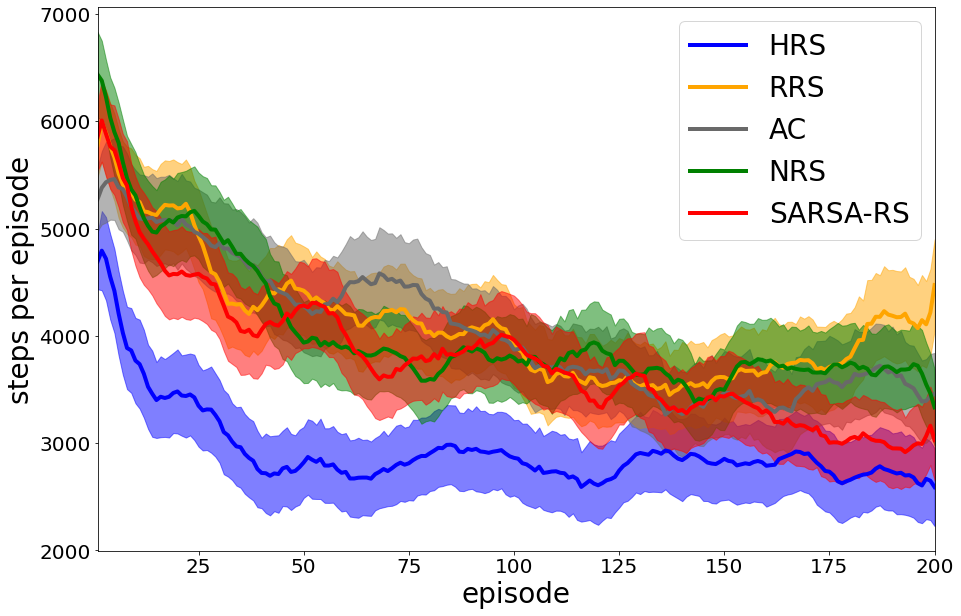

In [7]:
l_episodes = 200
plt.figure(figsize=(15, 10))
plt.tick_params(labelsize=20)
plot_mean_se(pin_df["HRS-10_moving_average"][:l_episodes], pin_df["HRS-lower"][:l_episodes], pin_df["HRS-upper"][:l_episodes], "blue", 0.5, "HRS")
plot_mean_se(pin_df["RRS-10_moving_average"][:l_episodes], pin_df["RRS-lower"][:l_episodes], pin_df["RRS-upper"][:l_episodes], "orange", 0.5, "RRS")
plot_mean_se(pin_df["AC-10_moving_average"][:l_episodes], pin_df["AC-lower"][:l_episodes], pin_df["AC-upper"][:l_episodes], "dimgray", 0.5, "AC")
plot_mean_se(pin_df["NRS-10_moving"][:l_episodes], pin_df["NRS-lower"][:l_episodes], pin_df["NRS-upper"][:l_episodes], "green", 0.5, "NRS")
plot_mean_se(pin_df["SARSA-RS-10_moving"][:l_episodes], pin_df["SARSA-RS-lower"][:l_episodes], pin_df["SARSA-RS-upper"][:l_episodes], "red", 0.5, "SARSA-RS")
plt.ylabel("steps per episode", fontsize=28)
plt.xlabel("episode", fontsize=28)
plt.xlim(1, l_episodes)
plt.legend(fontsize=28)
plt.savefig("out/pinball-learning-curves.pdf", format="pdf")

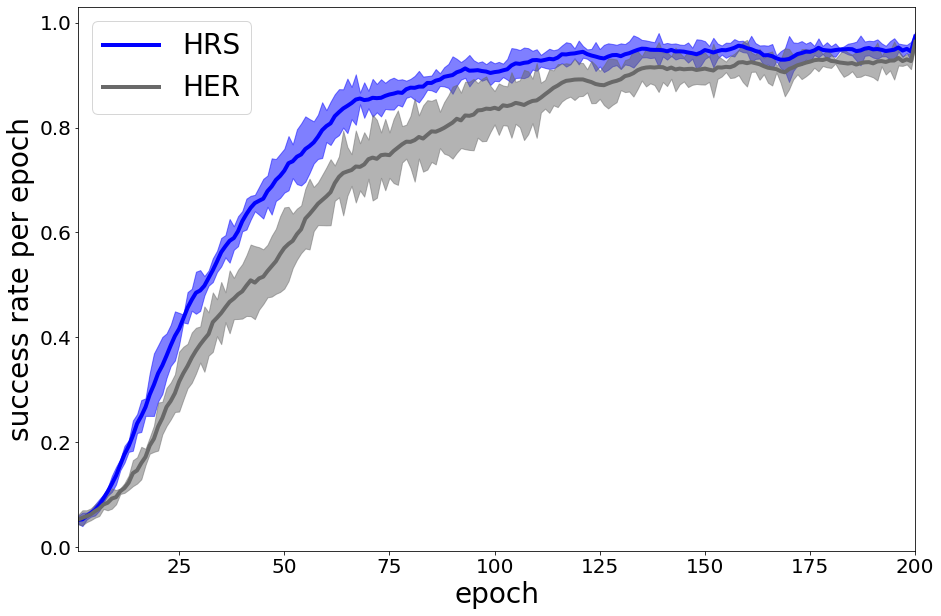

In [13]:
l_episodes = 200
plt.figure(figsize=(15, 10))
plt.tick_params(labelsize=20)
plot_mean_se(pick_df["HRS-mv"][:l_episodes], pick_df["HRS-lower"][:l_episodes], pick_df["HRS-upper"][:l_episodes], "blue", 0.5, "HRS")
plot_mean_se(pick_df["HER-mv"][:l_episodes], pick_df["HER-lower"][:l_episodes], pick_df["HER-upper"][:l_episodes], "dimgray", 0.5, "HER")
# plot_mean_se(pick_df["SARSA-RS-mv"][:l_episodes], pick_df["SARSA-RS-lower"][:l_episodes], pick_df["SARSA-RS-upper"][:l_episodes], "red", 0.5, "SARSA-RS")
plt.ylabel("success rate per epoch", fontsize=28)
plt.xlabel("epoch", fontsize=28)
plt.xlim(1, l_episodes)
plt.legend(fontsize=28)
plt.savefig("out/robotics-learning-curves.pdf", format="pdf")